## Color threshold: Blue screen

#### Imports

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#### Read Images

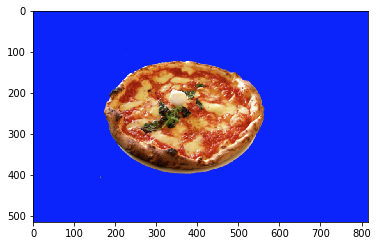

In [3]:
#Read image from disk
image = cv2.imread("images/pizza_bluescreen.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)

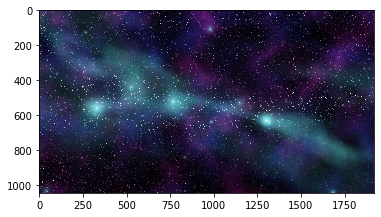

In [4]:
imagebg = cv2.imread("images/space_background.jpg")
imagebg_rgb = cv2.cvtColor(imagebg, cv2.COLOR_BGR2RGB)

plt.imshow(imagebg_rgb)

#### Define thresholds for blue screen

In [5]:
low_blue = np.array([0,0,150])
upper_blue = np.array([80,80,255])

#### Define a mask using the thresholds

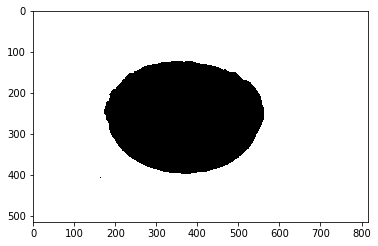

In [6]:
mask = cv2.inRange(image_rgb, low_blue, upper_blue)
plt.imshow(mask, cmap="gray")

#### Mask the image

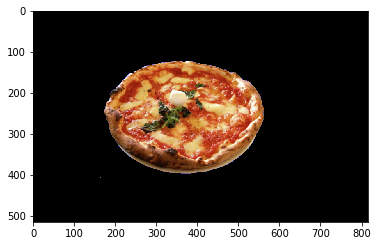

In [7]:
masked_image = np.copy(image_rgb)
masked_image[mask!=0] = [0,0,0]

plt.imshow(masked_image)

#### Crop the background image

(514, 816, 3)
(514, 816, 3)


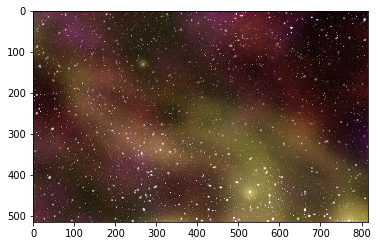

In [8]:
print(masked_image.shape)

crop_space = imagebg[0:514, 0:816]
plt.imshow(crop_space)

print(crop_space.shape)

#### Apply background to pizza photo

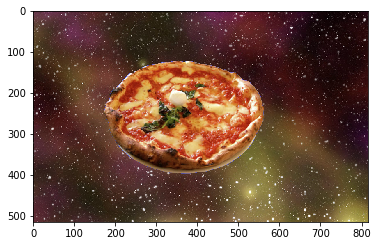

In [31]:
final_comp = np.array([[[0,0,0] for y in range(816)] for x in range (514)])

#Loop goes through the pizza masked image & when it find a black px, it replaces that 
#pixel with info from the bg image.

for x in range(816):
    for y in range(514):
        if(masked_image[y,x][0] == 0 and masked_image[y,x][1] == 0 and masked_image[y,x][2] == 0):
            final_comp[y,x][0] = crop_space[y,x][0]
            final_comp[y,x][1] = crop_space[y,x][1]
            final_comp[y,x][2] = crop_space[y,x][2]
        else:
            final_comp[y,x][0] = masked_image[y,x][0]
            final_comp[y,x][1] = masked_image[y,x][1]
            final_comp[y,x][2] = masked_image[y,x][2]  
            
plt.imshow(final_comp)